# Notebook for Maximum Likelihood Estimation
In this notebook following aspects of this estimation will be examined.

- accuracy
- bias



##  1.Create Simulation Enviroment

In this example $Y=AX+N$ simulation enviroment will be created.
In this equation:
- Y is the observation
- A is system geometry parameters
- X is varible (the thing which is observed )
- N is randomly distrubuted zero mean gaussian noise

Size of this vector and matrices are:
$$ Y_{mx1}=A_{mxn}X_{nx1} + N_{mx1} $$


now contiune with code.

#### Import libraries


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

#plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline 

#### Create X and sizes
- X will be read from image and converted to vector
- X will be resized to (K,L) and normalized to between 0-1
- size of the image is (K,L) so n should be K*L


[[0.61176471 0.61568627 0.61960784 ... 0.61176471 0.60392157 0.59607843]
 [0.61176471 0.61568627 0.61960784 ... 0.60392157 0.59215686 0.59607843]
 [0.61176471 0.61568627 0.61960784 ... 0.59215686 0.58431373 0.59215686]
 ...
 [0.4627451  0.46666667 0.4745098  ... 0.45098039 0.45098039 0.40784314]
 [0.4627451  0.44313725 0.48627451 ... 0.40784314 0.43137255 0.45098039]
 [0.50196078 0.50980392 0.55686275 ... 0.43921569 0.50196078 0.49803922]]


c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


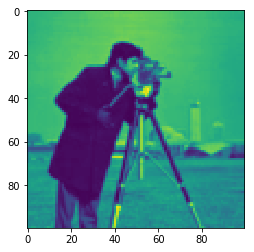

In [2]:
K = 100
L = 100
m = int(1.2*K*L)
n = K*L

# Create X read image
X_image = misc.imread('test/test1.jpg', mode="L") # grayscale mode
X_image = misc.imresize(X_image, (K,L))/ 255
#convert to vector
def toVector(a):
    return a.reshape(-1,1) 
    
def toImage(a):
    return a.reshape(K,L)

X = toVector(X_image)
plt.figure()
plt.imshow(X_image)
print(X_image)

#### Create Noise

Gaussian noise is defined using mean and varience.
For this simulation mean is selected as 0

In [3]:
N =  (np.random.rand(m,1)-0.5) 

#### Create Y and A at suitable dimesion
- A is generated randomly
- to calculate Y formula is $Y=AX+N$

In [4]:

A = np.random.rand(m,n)
Y = A @ X + N

print( np.shape(Y), np.shape(A), np.shape(X), np.shape(N) )


(12000, 1) (12000, 10000) (10000, 1) (12000, 1)


## 2. Calculate maximum likelihood
Maximum likelihood is calculated using this formula

$$X_{ml} = (A^TA)^{-1}.A^T.Y$$


In [5]:
Xml =  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y


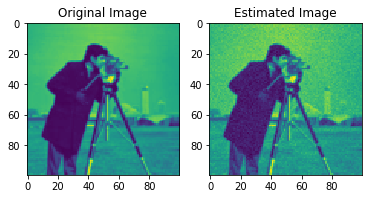

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(toImage(X))
ax2 = fig.add_subplot(122)
ax2.imshow(toImage(Xml))
ax1.title.set_text('Original Image')
ax2.title.set_text('Estimated Image')
plt.show()

#### This simulation should be converted to function to easily run

In [7]:
def calculateMaxlikelihood(A, X):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5)
    Y = A@X + N
    # return Xml
    return  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y


K = 10
L = 10
m = int(1.2*K*L)
n = K*L

# Create X read image
X_image = misc.imread('test/test1.jpg', mode="L") # grayscale mode
X_image = misc.imresize(X_image, (K,L))/ 255
#convert to vector
def toVector(a):
    return a.reshape(-1,1) 
    
def toImage(a):
    return a.reshape(K,L)

X = toVector(X_image)
A = np.random.rand(m,n)
print( np.shape(Y), np.shape(A), np.shape(X), np.shape(N) )

    

(12000, 1) (120, 100) (100, 1) (12000, 1)


c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


## 2. Bias of maximum likelihood
Bias of maximum likelihood calculated as:

Theoritical bias of maximum likelihood is zero. It can be calculated as:

Therefore the real bias should be decrease with increase of tries


In [8]:
def calculcateBias(x, xml):
    B = x-xml
    return np.sum(B)/len(x)
    

Run simulation 100.000 times and save all bias to an array

In [9]:
biasArr = [] 
for i in range(100000):
    curTryBias = calculcateBias(X, calculateMaxlikelihood(A,X))
    biasArr.append(curTryBias)
plt.figure()    


[2.90719898e-05 3.37603766e-05 5.05166422e-05 2.02066279e-05
 1.29393838e-06]


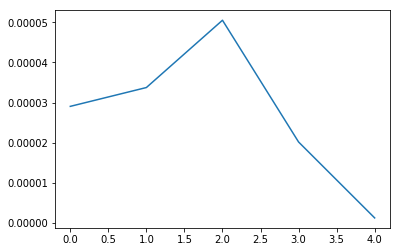

In [10]:
sample10 = np.sum( biasArr[0:10] )/10
sample100 = np.sum( biasArr[0:100] )/100
sample1_000 = np.sum( biasArr[0:1000] )/1000
sample10_000 = np.sum( biasArr[0:10000] )/10000
sample100_000 = np.sum( biasArr[0:100000] )/100000

biasSampleArr = np.abs([sample10, sample100, sample1_000, sample10_000, sample100_000])
print( biasSampleArr )
plt.figure()
plt.plot(biasSampleArr)
plt.show()

## 3. Varience of maximum likelihood
Varience of estimations calculated as:

$$
varience = \frac1{n} \sum\limits_{i=1}^n(x_i - \overline{x})^2 
$$


In [11]:
def calculateVarience(x, xml):
    V = np.square(x-xml) 
    return V.mean()

Run simulation 100.000 times and save all varience to an array

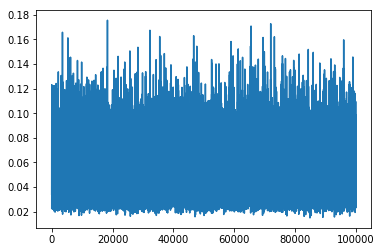

In [12]:
varArr = [] 
for i in range(100000):
    curTryVar = calculateVarience(X, calculateMaxlikelihood(A,X))
    varArr.append(curTryVar)
plt.figure()
plt.plot(varArr)
    

[0.04125294 0.05197589 0.05068775 0.05067544 0.05031609]


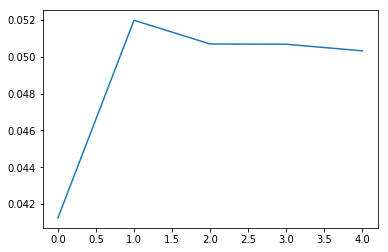

In [13]:
sample10 = np.sum( varArr[0:10] )/10
sample100 = np.sum( varArr[0:100] )/100
sample1_000 = np.sum( varArr[0:1000] )/1000
sample10_000 = np.sum( varArr[0:10000] )/10000
sample100_000 = np.sum( varArr[0:100000] )/100000

varSampleArr = np.abs([sample10, sample100, sample1_000, sample10_000, sample100_000])
print( varSampleArr )
plt.figure()
plt.plot(varSampleArr)
plt.show()